# Parsing JSON Data

In [59]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint

In [2]:
parse = False
pickle_data = False

if(parse):
    json_data = open('data.json')
    list_data = []
    for line in json_data:
        list_data.append(json.loads(line))
    raw_data = []
    for index, d in enumerate(list_data):
        if isinstance(d, dict):
            raw_data.append(d)
    raw_data = pd.DataFrame(raw_data)
    raw_data = raw_data.drop(['adr_address','formatted_phone_number','icon','id','international_phone_number',
                                'permanently_closed','photos','place_id','price_level','rating','reference',
                                'reviews','scope','url','utc_offset','website'], axis=1)
    if(pickle_data):
        pickle_out = open('raw_data.pickle','wb')
        pickle.dump(raw_data, pickle_out)
        pickle_out.close()
else:
    pickle_in = open('raw_data.pickle','rb')
    raw_data = pickle.load(pickle_in)
    pickle_in.close()

In [3]:
raw_data.shape

(149506, 7)

In [4]:
raw_data.columns

Index(['address_components', 'formatted_address', 'geometry', 'name',
       'opening_hours', 'types', 'vicinity'],
      dtype='object')

In [5]:
data = raw_data

# Geometry: Latitude and Longitude

In [6]:
latitude = []
longitude = []
location = []

for point in data['geometry']:
    lat = point['location']['lat']
    lng = point['location']['lng']
    loc = [lat, lng]
    latitude.append(lat)
    longitude.append(lng)
    location.append(loc)

location = np.array(location)

Plotting all the given points with respect to the coordinates

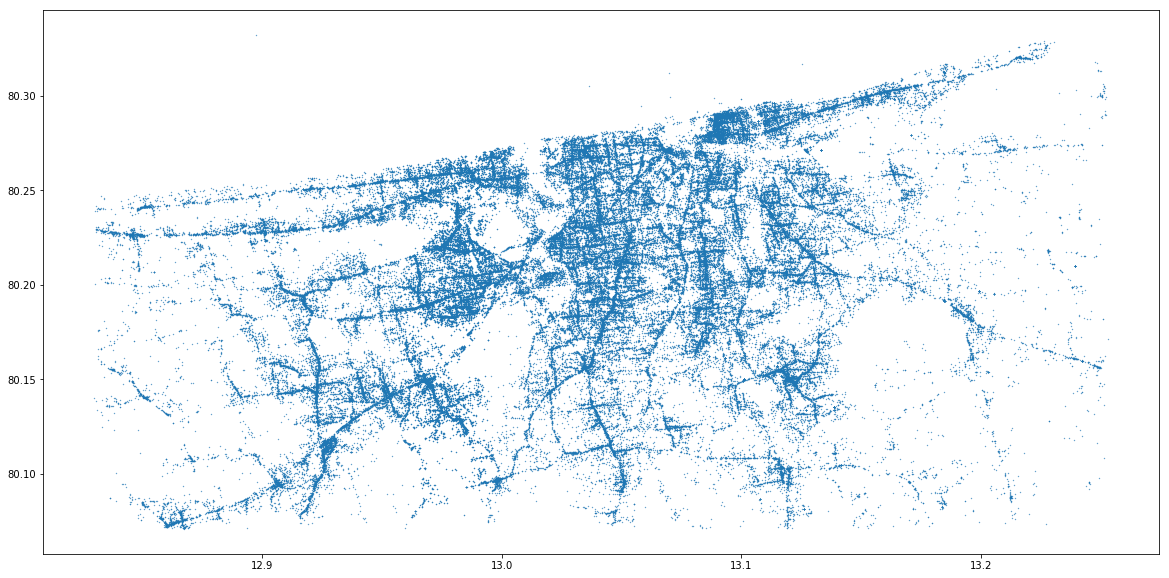

In [7]:
figure = plt.figure(figsize=(20,10))
plt.scatter(latitude, longitude, s=0.1)

# K-Means

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [27]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

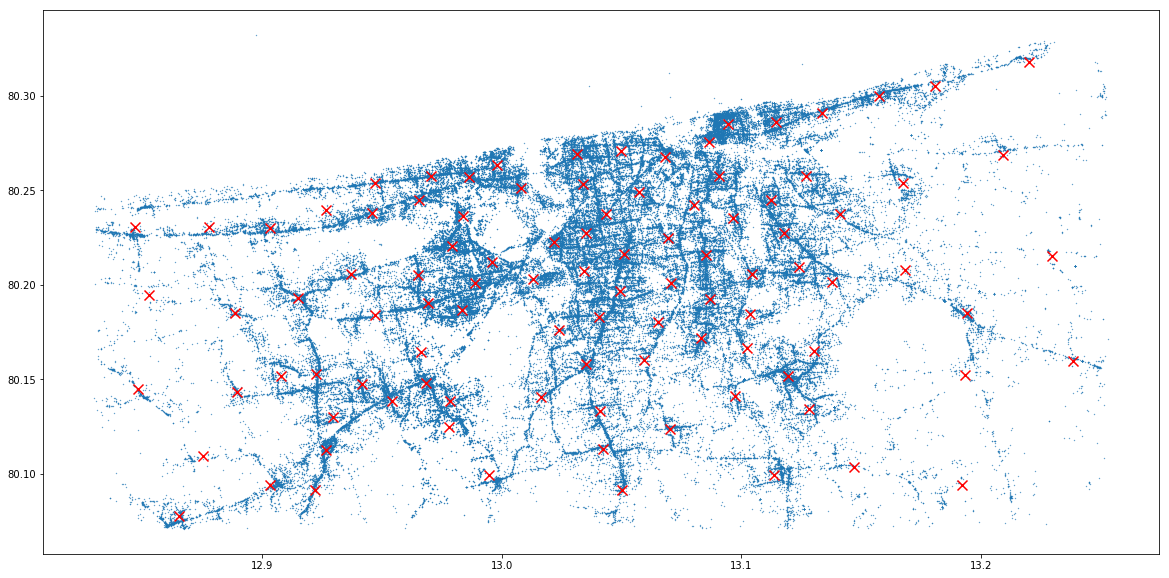

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(latitude, longitude, s=0.1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=10, zorder=100, color='red')

# DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbs = DBSCAN(eps=0.003, min_samples=50)
dbs.fit(location)

DBSCAN(algorithm='auto', eps=0.003, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None)

In [103]:
labels = dbs.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64)

In [104]:
generate_colors = False
if(generate_colors):
    unique_colors = {}
    for label in np.unique(labels):
        unique_colors[label] = ('#'+'%06X' % randint(0, 0xFFFFFF))
    pickle_out = open('unique_colors.pickle','wb')
    pickle.dump(unique_colors,pickle_out)
    pickle_out.close()
else:
    pickle_in = open('unique_colors.pickle','rb')
    unique_colors = pickle.load(pickle_in)
    pickle_in.close()
    
color_list = []
for label in labels:
    color_list.append(unique_colors[label])

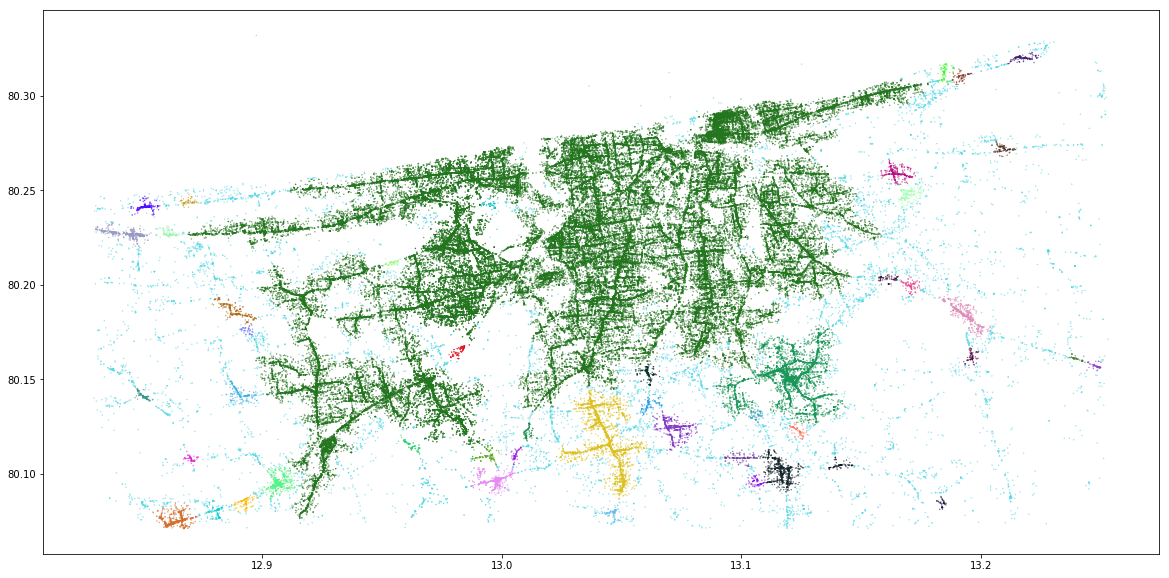

In [105]:
plt.figure(figsize=(20,10))
plt.scatter(latitude, longitude, s=0.1, linewidths=1, color=color_list)